<IPython.core.display.Javascript object>


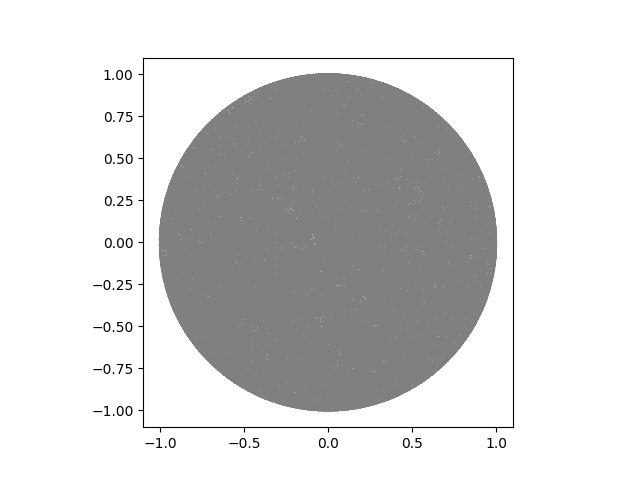

In [1]:
from mshr import *
from dolfin import *
import matplotlib.pyplot as plt
%matplotlib notebook

domain = Circle(Point(0, 0), 1)
mesh = generate_mesh(domain, 64)
V = FunctionSpace(mesh, 'P', 1)

plt.figure(1)
plot(mesh)
plt.show()

In [2]:

w_D = Expression('1 - x[0]*x[0] - x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
	return on_boundary

bc = DirichletBC(V, w_D, boundary)

beta = 8
R0 = 0.6
p = Expression('4 * exp(-pow(beta, 2) * (pow(x[0], 2) + pow(x[1] - R0, 2)))',
              degree=1, beta=beta, R0=R0)

In [3]:
w = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(w), grad(v))*dx
L = p*v*dx

w = Function(V)
solve(a == L, w, bc)

<IPython.core.display.Javascript object>


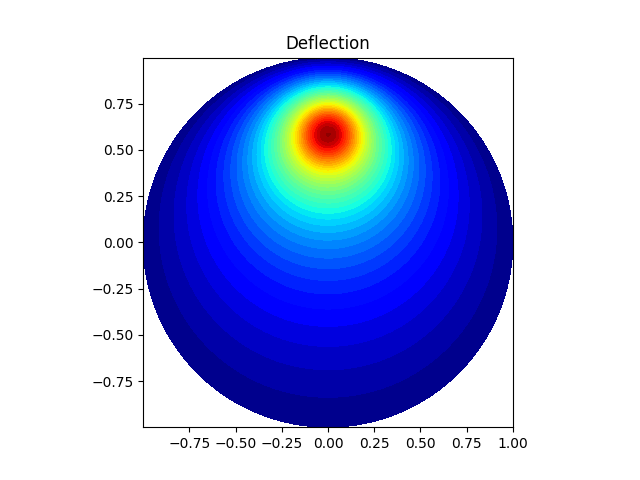

<IPython.core.display.Javascript object>


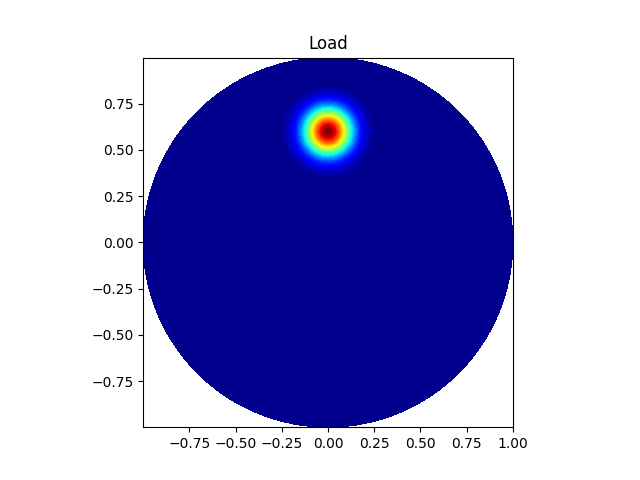

In [4]:
p = interpolate(p, V)
plt.figure(2)
wp = plot(w, title='Deflection')
wp.set_cmap('jet')
plt.figure(3)
pp = plot(p, title='Load')
pp.set_cmap('jet')

In [5]:
vtkfile_w = File('deflection.pvd')
vtkfile_w << w
vtkfile_p = File('load.pvd')
vtkfile_p << p

In [6]:
# curve plot along x = 0 comparing w and p
import numpy as np
tol = 0.001 # avoid hitting points outside domain
y = np.linspace(-1 + tol, 1 - tol, 101)
points = [(0, y_) for y_ in y] # 2D points
w_line = np.array([w(point) for point in points])
p_line = np.array([p(point) for point in points])

<IPython.core.display.Javascript object>


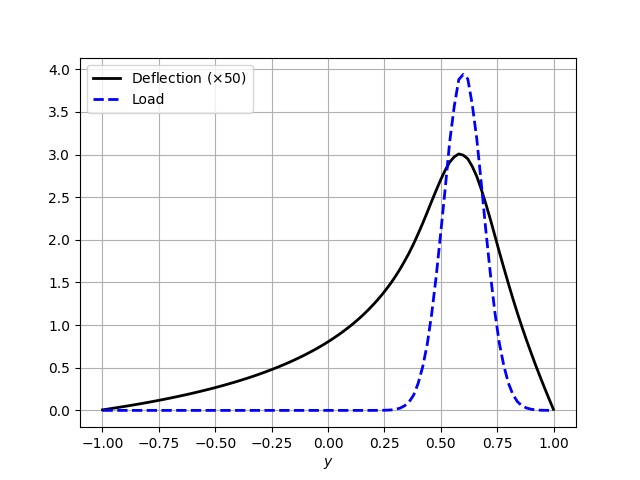

In [7]:
plt.figure(4)
plt.plot(y, 50*w_line, 'k', linewidth=2) # magnify w
plt.plot(y, p_line, 'b--', linewidth=2)
plt.grid(True)
plt.xlabel('$y$')
plt.legend(['Deflection ($\\times 50$)', 'Load'], loc='upper left')
plt.show()